# preparacion de datos desde archivo .npy

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#cargar npy
import numpy as np
import pandas as pd

merged_np = np.load('drive/MyDrive/dict_stamps.npy', allow_pickle = True)  #cargar datos
merged_df = pd.DataFrame(merged_np)  #Transformar a Dataframe
merged_df.columns = ['ID','p_smooth', 'p_features', 'p_irregular', 'p_point_source', 'p_unclassifiable', 'data' ]  #renombrar columnas de acuerdo al original
merged_df

In [ ]:
#UTILIZANDO DATOS .NPY CARGADOS:
x_data_train = np.stack(merged_df["data"].values, axis=0)     #SEPARO LOS DATOS DE ENTRADA DE ENTRENAMIENTO, DESDE LA COLUMNA DATA, DEL ARCHIVO .NPY CARGADO
x_data_train= x_data_train.reshape(-1, 31, 31, 1)                   #reshape PARA LA ENTRADA A LA CNN como datos de entrenamiento, con forma 31x31 pix, 1 solo color.
y_data_train = np.array(merged_df.iloc[:,1:6])                #SEPARO LOS DATOS DE SALIDA(PROB. CLASES) DESDE ARCHIVO .NPY CARGADO (columnas de clases)

print('shape de datos de entrenamiento son:')
x_data_train.shape, y_data_train.shape

shape de datos de entrenamiento son:


((6431, 31, 31, 1), (6431, 5))

In [ ]:
from sklearn.model_selection import train_test_split
import tensorflow as tf

#X:
x_data_train = tf.convert_to_tensor(x_data_train)    #converttir a tensor, ya que el modelo lee de esta forma, sino arroja error.

#Y:
y_data_train = y_data_train.astype('float32')       #transformar a float 32 para poder convertir a tensor.
y_data_train = tf.convert_to_tensor(y_data_train)   #converttir a tensor, ya que el modelo lee de esta forma, sino arroja error.

x_data_train.shape, y_data_train.shape

(TensorShape([6431, 31, 31, 1]), TensorShape([6431, 5]))

# Modelo 1: 
El modelo 1 se encuentra en el jupyter anterior, el cual se implemento mediante vscode para el tratamiento de los datos, ya que el peso de los archivos de imagenes era muy alto

# modelo 2: LeNet con dropout

Epoch 1/50
5144/5144 [==============================] - 21s 4ms/step - loss: 0.0471 - accuracy: 0.6433 - val_loss: 0.0376 - val_accuracy: 0.6698
Epoch 2/50
5144/5144 [==============================] - 23s 4ms/step - loss: 0.0355 - accuracy: 0.7117 - val_loss: 0.0340 - val_accuracy: 0.7280
Epoch 3/50
5144/5144 [==============================] - 26s 5ms/step - loss: 0.0340 - accuracy: 0.7187 - val_loss: 0.0332 - val_accuracy: 0.7288
Epoch 4/50
5144/5144 [==============================] - 21s 4ms/step - loss: 0.0331 - accuracy: 0.7232 - val_loss: 0.0336 - val_accuracy: 0.7211
Epoch 5/50
5144/5144 [==============================] - 22s 4ms/step - loss: 0.0318 - accuracy: 0.7344 - val_loss: 0.0335 - val_accuracy: 0.7211
Epoch 6/50
5144/5144 [==============================] - 28s 5ms/step - loss: 0.0313 - accuracy: 0.7344 - val_loss: 0.0315 - val_accuracy: 0.7335
Epoch 7/50
5144/5144 [==============================] - 20s 4ms/step - loss: 0.0303 - accuracy: 0.7362 - val_loss: 0.0313 - val_ac

Text(0.5, 1.0, 'Train - Accuracy')

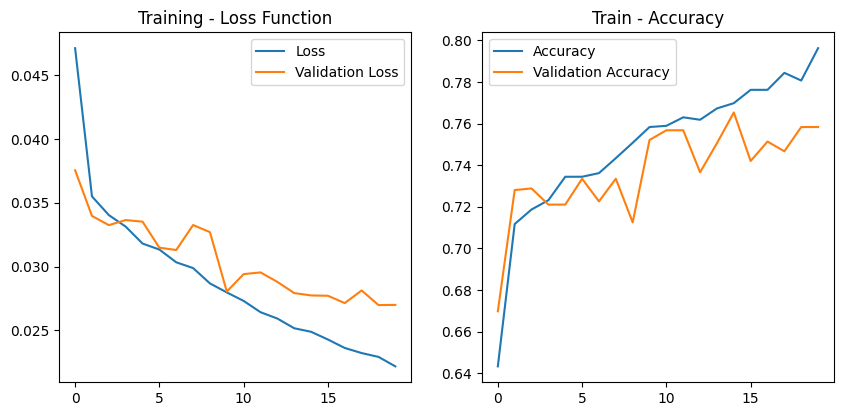

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.optimizers import Adam
import matplotlib.pyplot as plt 
from keras.callbacks import EarlyStopping


# Crear modelo
model2 = keras.Sequential()

# Añadir capas
model2.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=(31, 31, 1)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Dropout(0.3))     #se agrego dropout de 30%
model2.add(layers.Conv2D(256, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Dropout(0.3))     #se agrego dropout de 30%
model2.add(layers.Conv2D(512, (3, 3), activation='relu'))
#fully connected
model2.add(layers.Flatten())
model2.add(layers.Dense(128, activation='relu'))
model2.add(layers.Dense(5, activation='softmax'))


# Compilar modelo
optimizer = Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999)   
model2.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['accuracy'])

# Entrenar modelo
history2 = model2.fit(x_data_train, y_data_train, epochs=50, batch_size= 1, callbacks = [EarlyStopping(monitor='val_accuracy', patience=5)], validation_split=0.2)  


#plot
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(history2.history['loss'], label='Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history2.history['accuracy'], label='Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

el desempeño del accuracy aumento, sigue con algunas fluctuaciones. en cuanto a la curva de perdida en la epoca 10 comienza un leve overfitting, pero mejora respecto al modelo anterior.

In [ ]:
#obtener predicciones y guardar en variable predicted_classes:
predicted_classes = model2.predict(x_test)            #y_test o predicciones de datos que no ha visto el modelo
predicted_classes = pd.DataFrame(predicted_classes)   #transformo a dataframe
predicted_classes

36/36 [==============================] - 0s 3ms/step


,0,1,2,3,4
0,0.200256,0.200079,0.199844,0.199914,0.199906
1,0.199838,0.200652,0.200348,0.200373,0.198789
2,0.200298,0.200131,0.199882,0.199945,0.199744
3,0.199980,0.200069,0.200126,0.199988,0.199838
4,0.200019,0.200091,0.200019,0.200115,0.199757
...,...,...,...,...,...
1131,0.200012,0.200005,0.200088,0.199986,0.199910
1132,0.200981,0.200163,0.200764,0.200326,0.197766
1133,0.199974,0.200147,0.200034,0.200146,0.199698
1134,0.200135,0.200068,0.200128,0.200042,0.199626


In [ ]:
x_test_id= pd.read_csv('/content/drive/MyDrive/predicted.csv')   #guardamos a csv
x_test_id = x_test_id['ID']                                      #guardo solo la columna de ID´s para juntarla con las predicciones y cumplir con el requerimeinto de la 6ta columna.

((1136,), (1136, 5))

In [ ]:
predicted2 = pd.concat([x_test_id, predicted_classes], axis=1)   #juntamos la columna ID del archivo de prediciones que se tenia guardado por mi con los datos de prediccion.
predicted2.columns = ['ID','p_smooth', 'p_features', 'p_irregular', 'p_point_source', 'p_unclassifiable']   #se renombran las columnas de salida
predicted2

,ID,p_smooth,p_features,p_irregular,p_point_source,p_unclassifiable
0,GDS_deep2_10075,0.200256,0.200079,0.199844,0.199914,0.199906
1,GDS_deep2_10082,0.199838,0.200652,0.200348,0.200373,0.198789
2,GDS_deep2_10087,0.200298,0.200131,0.199882,0.199945,0.199744
3,GDS_deep2_10110,0.199980,0.200069,0.200126,0.199988,0.199838
4,GDS_deep2_10135,0.200019,0.200091,0.200019,0.200115,0.199757
...,...,...,...,...,...,...
1131,GDS_wide2_9762,0.200012,0.200005,0.200088,0.199986,0.199910
1132,GDS_wide2_9865,0.200981,0.200163,0.200764,0.200326,0.197766
1133,GDS_wide2_9894,0.199974,0.200147,0.200034,0.200146,0.199698
1134,GDS_wide2_991,0.200135,0.200068,0.200128,0.200042,0.199626


In [ ]:
#predicted2.set_index('ID', inplace=True)   #se establece la columna ID como indice del dataframe sobre la variable predicted2
predicted2

,p_smooth,p_features,p_irregular,p_point_source,p_unclassifiable
ID,,,,,
GDS_deep2_10075,0.200256,0.200079,0.199844,0.199914,0.199906
GDS_deep2_10082,0.199838,0.200652,0.200348,0.200373,0.198789
GDS_deep2_10087,0.200298,0.200131,0.199882,0.199945,0.199744
GDS_deep2_10110,0.199980,0.200069,0.200126,0.199988,0.199838
GDS_deep2_10135,0.200019,0.200091,0.200019,0.200115,0.199757
...,...,...,...,...,...
GDS_wide2_9762,0.200012,0.200005,0.200088,0.199986,0.199910
GDS_wide2_9865,0.200981,0.200163,0.200764,0.200326,0.197766
GDS_wide2_9894,0.199974,0.200147,0.200034,0.200146,0.199698


In [ ]:
predicted2.to_csv('predicted2.csv', index=True)   #guardamos a csv lo predicho en el modelo 2, segunda prediccion enviada.


# alexnet



Epoch 1/50


Exception ignored in: <function _xla_gc_callback at 0x7f66e5e02f80>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 97, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


515/515 [==============================] - 165s 102ms/step - loss: 1.4662 - accuracy: 0.6275 - val_loss: 0.1130 - val_accuracy: 0.6884
Epoch 2/50
515/515 [==============================] - 51s 99ms/step - loss: 0.0709 - accuracy: 0.7144 - val_loss: 0.0494 - val_accuracy: 0.7273
Epoch 3/50
515/515 [==============================] - 52s 100ms/step - loss: 0.0466 - accuracy: 0.7107 - val_loss: 0.0423 - val_accuracy: 0.7055
Epoch 4/50
515/515 [==============================] - 51s 100ms/step - loss: 0.0411 - accuracy: 0.7214 - val_loss: 0.0398 - val_accuracy: 0.7335
Epoch 5/50
515/515 [==============================] - 52s 100ms/step - loss: 0.0386 - accuracy: 0.7257 - val_loss: 0.0384 - val_accuracy: 0.7110
Epoch 6/50
515/515 [==============================] - 49s 96ms/step - loss: 0.0377 - accuracy: 0.7251 - val_loss: 0.0381 - val_accuracy: 0.7428
Epoch 7/50
515/515 [==============================] - 49s 95ms/step - loss: 0.0370 - accuracy: 0.7304 - val_loss: 0.0351 - val_accuracy: 0.748

Text(0.5, 1.0, 'Train - Accuracy')

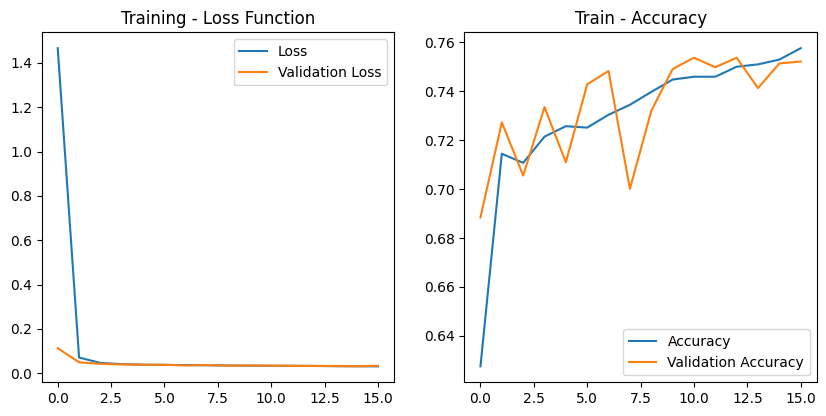

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.optimizers import Adam
import matplotlib.pyplot as plt 
from keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

# Define the AlexNet model architecture
model3 = keras.Sequential([
    # Convolutional layers
    layers.Conv2D(128, kernel_size=3, strides=1, activation="relu", input_shape=(31, 31, 1)),
    layers.MaxPooling2D(pool_size=3, strides=1),
    layers.Conv2D(256, kernel_size=5, padding="same", activation="relu"),
    layers.MaxPooling2D(pool_size=3, strides=1),
    layers.Conv2D(512, kernel_size=3, padding="same", activation="relu"),
    layers.Conv2D(512, kernel_size=3, padding="same", activation="relu"),
    layers.Conv2D(256, kernel_size=3, padding="same", activation="relu"),
    layers.MaxPooling2D(pool_size=3, strides=2),
    
    # Flatten layer
    layers.Flatten(),
    
    # Fully-connected layers
    layers.Dense(4096, activation="relu", kernel_regularizer=l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(4096, activation="relu", kernel_regularizer=l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(5, activation="softmax")
])

# Compile the model
optimizer = Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999)
model3.compile(optimizer=optimizer,loss='mean_squared_error', metrics=["accuracy"])


# Entrenar modelo
history3 = model3.fit(x_data_train, y_data_train, epochs=50, batch_size= 10, callbacks = [EarlyStopping(monitor='val_accuracy', patience=5)], validation_split=0.2)

# Print model summary
model3.summary()


#plot
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(history3.history['loss'], label='Loss')
plt.plot(history3.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history3.history['accuracy'], label='Accuracy')
plt.plot(history3.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

Se ve que el error disminuye rapidamente, sin embargo el accuracy se ve inestable pero en promedio menor a lo logrado en el segundo modelo (LeNet con dropout), por lo tanto no necesariamente un modelo mas complicado puede lograr mejores resultados, no obstante, el entrenamiento fue mas rapido.

In [ ]:
#Get the predictions for the test data
predicted_classes = model3.predict(x_test)   #y_test o predicciones de datos que no ha visto el modelo
predicted_classes

36/36 [==============================] - 1s 8ms/step


array([[4.4482374e-01, 9.1176853e-02, 3.3969063e-02, 4.0818587e-01,
        2.1844549e-02],
       [1.3564554e-01, 7.8950220e-01, 6.4421214e-02, 6.1562299e-03,
        4.2748172e-03],
       [4.8528689e-01, 2.3121832e-01, 5.7473615e-02, 2.1041651e-01,
        1.5604680e-02],
       ...,
       [1.6608354e-02, 9.1915393e-01, 5.9067618e-02, 4.4211670e-04,
        4.7279978e-03],
       [6.4663696e-01, 1.4677210e-01, 1.6064117e-02, 1.8872224e-01,
        1.8045927e-03],
       [8.4440336e-02, 8.7453026e-01, 3.7899159e-02, 1.7467117e-03,
        1.3835059e-03]], dtype=float32)

# VGG

Epoch 1/50
1029/1029 [==============================] - 22s 20ms/step - loss: 0.0575 - accuracy: 0.5682 - val_loss: 0.0564 - val_accuracy: 0.5563
Epoch 2/50
1029/1029 [==============================] - 21s 21ms/step - loss: 0.0559 - accuracy: 0.5704 - val_loss: 0.0562 - val_accuracy: 0.5563
Epoch 3/50
1029/1029 [==============================] - 19s 19ms/step - loss: 0.0558 - accuracy: 0.5704 - val_loss: 0.0562 - val_accuracy: 0.5563
Epoch 4/50
1029/1029 [==============================] - 20s 19ms/step - loss: 0.0556 - accuracy: 0.5704 - val_loss: 0.0563 - val_accuracy: 0.5563
Epoch 5/50
1029/1029 [==============================] - 19s 19ms/step - loss: 0.0556 - accuracy: 0.5704 - val_loss: 0.0563 - val_accuracy: 0.5563
Epoch 6/50
1029/1029 [==============================] - 20s 19ms/step - loss: 0.0555 - accuracy: 0.5704 - val_loss: 0.0563 - val_accuracy: 0.5563


Text(0.5, 1.0, 'Train - Accuracy')

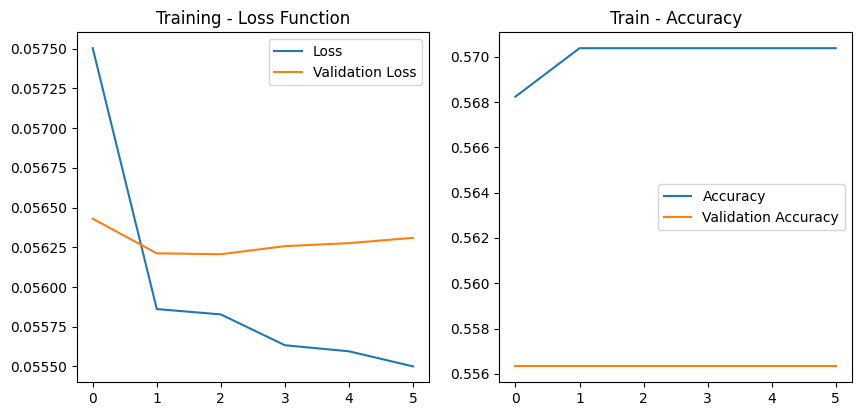

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Definir el modelo
model4 = Sequential()

# Capas convolucionales
model4.add(Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(31, 31, 1)))
model4.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model4.add(MaxPooling2D((2, 2), strides=(2, 2)))

model4.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model4.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model4.add(MaxPooling2D((2, 2), strides=(2, 2)))

model4.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model4.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model4.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model4.add(MaxPooling2D((2, 2), strides=(2, 2)))

model4.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model4.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model4.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model4.add(MaxPooling2D((2, 2), strides=(2, 2)))

model4.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model4.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model4.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
# model4.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Capas completamente conectadas
model4.add(Flatten())
model4.add(Dense(128, activation='relu'))
model4.add(Dropout(0.5))
model4.add(Dense(128, activation='relu'))
model4.add(Dropout(0.5))
model4.add(Dense(5, activation='softmax'))


# Compilar modelo
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
model4.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['accuracy'])   #categorical_crossentropy

# Entrenar modelo
history4 = model4.fit(x_data_train, y_data_train, epochs=50, batch_size= 5, callbacks = [EarlyStopping(monitor='val_accuracy', patience=5)], validation_split=0.2)


#plot
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(history4.history['loss'], label='Loss')
plt.plot(history4.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history4.history['accuracy'], label='Accuracy')
plt.plot(history4.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

El modelo VGG posee un overfitting muy grande y el accuracy se ve distante, considerando la escala a la cual está. No vale la pena efectuar la prediccion con este modelo.

In [ ]:
#Get the predictions for the test data
predicted_classes = model4.predict(x_test)   #y_test o predicciones de datos que no ha visto el modelo
predicted_classes